In [1]:
import pandas as pd
import matplotlib
# import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
%run ../modules/utils.ipynb
%run ../modules/cds.ipynb
%run ../modules/preprocessing.ipynb

(210, 3)


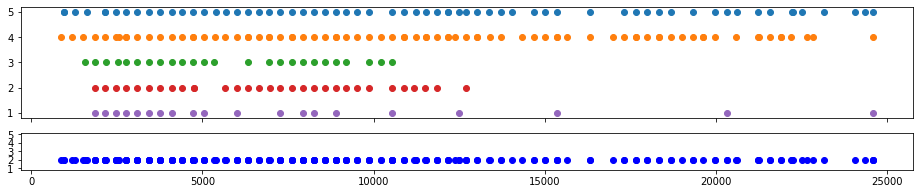

In [3]:
# 3p

df_3p_cca = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_phe/complementary_3p_cca.xlsx')
df_3p_cc = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_phe/complementary_3p_cc.xlsx')
# df_phe74_3p = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/SI/PheComplementary/phe74_3p.xlsx')

df_ox_3p_cca = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_a16Da/complementary_3p_cca.xlsx')
df_ox_3p_cc = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_a16Da/complementary_3p_cc.xlsx')

# df_16da_76_5p = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/data_5p_16da.xlsx')
# df_28da_76_3p = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/data_76_3p_28da.xlsx')
df_28da_75_3p = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/data_75_3p_28da.xlsx')

fig, (ax1, ax2) = plt.subplots(2, figsize=(16, 3), sharex=True, sharey=True, gridspec_kw={'height_ratios': [3, 1]})
# plt.xlabel('Position', fontname="Arial", fontsize=15, color='black')
# plt.ylabel('Relative Abandance', fontname="Arial", fontsize=15, color='black')
# plt.xticks(range(0, 77, 5), fontname="Arial", size=13, color='black')
# plt.yticks(range(6), fontname="Arial", size=13, color='black')
df_3p_cc = df_3p_cc.sort_values('Mass')
df_3p_cca = df_3p_cca.sort_values('Mass')
df_3p_cc.Mass += A
df_ox_3p_cc.Mass += A - 16
df_ox_3p_cca.Mass -= 16
df_28da_75_3p.Mass += A - 2*M
dfs = [(df_3p_cc, "24252 3'"), (df_3p_cca, "24581 3'"), 
       (df_ox_3p_cc, "24268 3'"), (df_ox_3p_cca, "24597 3'"),
       (df_28da_75_3p, "24280 3'")] #, (df_phe16_75_3p, "24268 3'"), (df_phe74_3p, "23947 3'")
total = len(dfs)
df_isoforms = list()
for idx, item in enumerate(dfs):
    df_iso = item[0].copy()
    if 'Position' in df_iso.columns:
        df_iso['pos'] = df_iso.Position
    else:
        df_iso['pos'] = df_iso.Mass/320
        df_iso.pos.astype(int)
    label = item[1]
    ax1.scatter(df_iso.Mass, [total - idx]*len(df_iso.Mass))
#     ax1.scatter(df_iso.Mass, [total - idx]*len(df_iso.Mass), label=label)
    
    df_iso['Isoform'] = idx + 1
    df_isoforms.append(df_iso)
# plt.legend(loc=4)

vols = ['Mass', 'RT', 'Vol']
df_merge_3p = pd.concat(df_isoforms)[vols].drop_duplicates(subset=['Mass', 'RT'])
print(df_merge_3p.shape)
ax2.scatter(df_merge_3p.Mass, [2]*df_merge_3p.shape[0], color='b')
# ax2.scatter(df_phe_final_3p.Position, [3]*df_phe_final_3p.shape[0], color='b')
# for idx, row in df_phe_final_3p.iterrows():
#     if row.Base is np.nan:
#         continue
#     x_pos = row.Position #int(row.Mass/320)
#     y_pos = 3.2
#     plt.annotate(text=row.Base, size=9, xy=(x_pos, y_pos), textcoords="offset points", xytext=(0, 0), ha='center', color='C0')

# output(df_merge_3p, plt, fig, 1, 'phe_complement_3p')

In [5]:

# df_tmp = df_3p_cc.copy()
# df_tmp.RT += 0.5
plotly_zones(df_3p_cc, df_3p_cca, names=['3p_cc', '3p_cca'])
# df_tmp = df_ox_3p_cca_rev.copy()
# df_tmp.RT += 0.5
plotly_zones(df_ox_3p_cc, df_ox_3p_cca, names=['ox_3p_cca', 'ox_3p_cca'])
plotly_zone(df_28da_75_3p)
# df_ox_3p_cca[(df_ox_3p_cca.Mass>12000) & (df_ox_3p_cca.Mass<13000)]
# df_28da_75_3p[(df_28da_75_3p.Mass>12000) & (df_28da_75_3p.Mass<13000)]

(285, 3)


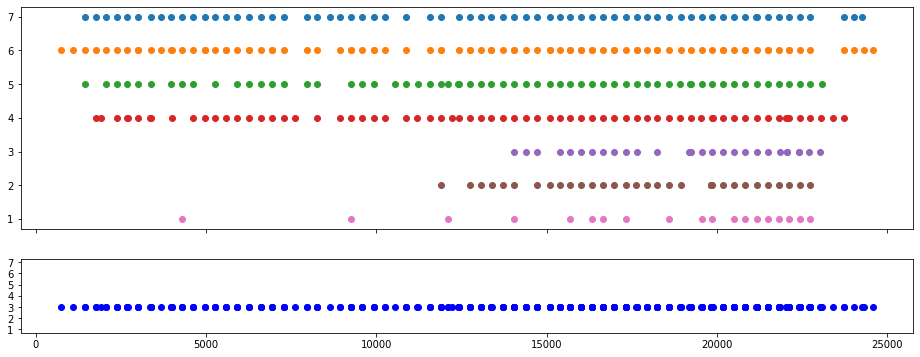

In [6]:
# 5p & 3p --> 5p

df_5p_cca = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_phe/complementary_5p_cca.xlsx')
df_5p_cc = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_phe/complementary_5p_cc.xlsx')
# df_phe74_5p = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/SI/PheComplementary/phe74_5p.xlsx')

df_3p_cca_rev = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_phe/complementary_3p_cca_rev.xlsx')
df_3p_cc_rev = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_phe/complementary_3p_cc_rev.xlsx')

df_ox_3p_cca_rev = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_a16Da/complementary_3p_cca_rev.xlsx')
df_ox_3p_cc_rev = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_a16Da/complementary_3p_cc_rev.xlsx')

# df_16da_76_5p = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/data_5p_16da.xlsx')
# df_28da_75_5p = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/data_5p_28da.xlsx')
df_16da_76_3p_rev = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/data_76_3p_16da_rev.xlsx')
df_28da_75_3p_rev = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs/data_75_3p_28da_rev.xlsx')

fig, (ax1, ax2) = plt.subplots(2, figsize=(16, 6), sharex=True, sharey=True, gridspec_kw={'height_ratios': [3, 1]})
# plt.xlabel('Position', fontname="Arial", fontsize=15, color='black')
# plt.ylabel('Relative Abandance', fontname="Arial", fontsize=15, color='black')
# plt.xticks(range(0, 77, 5), fontname="Arial", size=13, color='black')
# plt.yticks(range(6), fontname="Arial", size=13, color='black')
# ax1.set_yticks(range(6))
# ax2.set_yticks(range(2))

dfs = [(df_5p_cc, "24252 5'"), (df_5p_cca, "24581 5'"), 
       (df_3p_cc_rev, "24252 3' --> 5'"), (df_3p_cca_rev, "24581 3' --> 5'"), 
       (df_ox_3p_cc_rev, "24268 3' --> 5'"), (df_ox_3p_cca_rev, "24597 3' --> 5'"), 
      (df_28da_75_3p_rev, "24280 3' --> 5'")] 
        #, (df_phe16_75_5p, "24268 5'"), (df_phe74_5p, "23947 5'")(df_16da_76_3p_rev, "24597 3' --> 5'"), 
total = len(dfs)
df_isoforms = list()
for idx, item in enumerate(dfs):
    df_iso = item[0].copy()
    if 'Position' in df_iso.columns:
        df_iso['pos'] = df_iso.Position
    else:
        df_iso['pos'] = df_iso.Mass/320
        df_iso.pos.astype(int)
    label = item[1]
    ax1.scatter(df_iso.Mass, [total - idx]*len(df_iso.Mass), label=label)
    
    df_iso['Isoform'] = idx + 1
    df_isoforms.append(df_iso)
# plt.legend(loc=3)

vols = ['Mass', 'RT', 'Vol']
df_merge_5p = pd.concat(df_isoforms)[vols].drop_duplicates(subset=['Mass', 'RT'])
print(df_merge_5p.shape)
ax2.scatter(df_merge_5p.Mass, [3]*df_merge_5p.shape[0], color='b')
# ax2.scatter(df_phe_final_5p.Position, [3]*df_phe_final_5p.shape[0], color='b')
# for idx, row in df_merge_5p.iterrows():
#     x_pos = row.Mass #int(row.Mass/320)
#     y_pos = 3.2
#     plt.annotate(s=row.Base, size=9, xy=(x_pos, y_pos), textcoords="offset points", xytext=(0, 0), ha='center', color='C0')

# output(df_merge_5p, plt, fig, 1, 'phe_complement_5p3p')

In [7]:
df_tmp = df_5p_cc.copy()
df_tmp.RT += 0.5
plotly_zones(df_tmp, df_5p_cca, names=['5p_cc', '5p_cca'])
plotly_zones(df_3p_cc_rev, df_3p_cca_rev, names=['3p_cc_rev', '3p_cca_rev'])
df_tmp = df_ox_3p_cca_rev.copy()
df_tmp.RT += 0.5
plotly_zones(df_ox_3p_cc_rev, df_tmp, names=['ox_3p_cc_rev', 'ox_3p_cca_rev'])
plotly_zone(df_28da_75_3p_rev)